## Logistic Regression Model - Education
### Group case study - DS72

#### Problem Statement:
X Education, a company selling online courses, attracts industry professionals through various marketing channels. While they generate many leads daily, their conversion rate is low (~30%), meaning only a small percentage of leads become paying customers. To improve efficiency, they want to identify "Hot Leads"—those most likely to convert—so the sales team can focus on them. 

#### Objective:
Build a model that assigns a lead score to prioritize high-potential leads, aiming to increase the conversion rate to around 80%.



### Step 1: Importing & Inspecting Dataset

In [3]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Show all columns
pd.set_option('display.max_columns', None)

In [6]:
# Importing Leads dataset
leads_data = pd.read_csv("leads.csv")
# Read the head of dataset
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
# Check the dimensions of the dataframe
leads_data.shape

(9240, 37)

In [8]:
# Check the statistical aspects of the dataframe
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# check the type of each column
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 2: Data preparation

In [11]:
# check the percentage of null values in each column
(leads_data.isnull().sum()/len(leads_data))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

#### 2.1 Handle null value

##### Lead quality column

In [14]:
# see unique value in Lead quality column
leads_data['Lead Quality'].value_counts()

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [15]:
# check null value in Lead quality column
leads_data['Lead Quality'].isnull().sum()

4767

Consider keeping this column as it may significantly contribute to the lead scoring model. Replace null values with 'unknown' since this column has a high percentage of missing data (>51%). Removing these values would result in significant data loss, while replacing them with the mode could introduce bias. Using 'unknown' is the most appropriate approach to maintain data integrity.

In [17]:
# replace null values in Lead quality column by 'unknown'
leads_data['Lead Quality'].fillna('unknown',inplace = True)
# see unique value in Lead quality column after replacing null value
leads_data['Lead Quality'].value_counts()

Lead Quality
unknown              4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

##### Asymmetrique Activity Index / Asymmetrique Profile Index / Asymmetrique Activity Score / Asymmetrique Profile Score columns 

In [19]:
#Drop these columns as they have a high percentage of null values (>45%) and are not significantly important for the lead scoring model
leads_data = leads_data.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score'], axis = 1)
# Check the dimensions of the dataframe
leads_data.shape

(9240, 33)

##### Tags column

In [21]:
# see unique value in Tags column
leads_data['Tags'].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [22]:
# check null value in Tags column
leads_data['Tags'].isnull().sum()

3353

Replace null values with 'unknown' as this column has a high percentage of missing data (>36%). Removing them would lead to significant data loss, while replacing them with the mode could introduce bias. Using 'unknown' is the most appropriate approach to preserve data integrity

In [24]:
# replace null values in Tags column by 'unknown'
leads_data['Tags'].fillna('unknown',inplace = True)
# see unique value in Tags column after replacing null value
leads_data['Tags'].value_counts()

Tags
unknown                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

Group values with a frequency of less than 100 into "Others" to simplify the values in the Tags column and avoid unnecessary complexity when building the model

In [26]:
# filter values with count >= 100
tags_count = leads_data['Tags'].value_counts()
filter_tags_count = tags_count[tags_count >= 100].index
filter_tags_count

Index(['unknown', 'Will revert after reading the email', 'Ringing',
       'Interested in other courses', 'Already a student',
       'Closed by Horizzon', 'switched off', 'Busy', 'Lost to EINS',
       'Not doing further education', 'Interested  in full time MBA',
       'Graduation in progress'],
      dtype='object', name='Tags')

In [27]:
# replace rare values by 'others'
leads_data['Tags'] = leads_data['Tags'].apply(lambda x: x if x in filter_tags_count else 'Other')
# see unique value in Tags column after replacing rare values by 'others' value
leads_data['Tags'].value_counts()

Tags
unknown                                3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Other                                   302
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: count, dtype: int64

##### Lead Profile column

In [29]:
# see unique value in Lead Profile column
leads_data['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [30]:
# check null value in Tags column
leads_data['Lead Profile'].isnull().sum()

2709

The Lead Profile column contains both "Select" and null values, which do not provide any meaningful information. Therefore, both values will be replaced with "unknown" to prevent data loss if removed or potential bias if replaced with the mode.

In [32]:
# replace 'Select' by 'unknown'
leads_data['Lead Profile'] = leads_data['Lead Profile'].replace('Select','unknown')
# replace 'null' by 'unknown'
leads_data['Lead Profile'] = leads_data['Lead Profile'].fillna('unknown')

In [33]:
# see unique value in Lead Profile column after replacing value
leads_data['Lead Profile'].value_counts()

Lead Profile
unknown                        6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

##### 'What matters most to you in choosing a course', 'What is your current occupation', 'How did you hear about X Education' columns

In [35]:
# see unique value in these column
print (leads_data['What matters most to you in choosing a course'].value_counts())
print ('*'*20)
print (leads_data['What is your current occupation'].value_counts())
print ('*'*20)
print (leads_data['How did you hear about X Education'].value_counts())

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64
********************
What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64
********************
How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64


In [36]:
# see count of null values in these column
print ('null value of What matters most to you in choosing a course is',leads_data['What matters most to you in choosing a course'].isnull().sum())
print ('*'*20)
print ('null value of What is your current occupation is',leads_data['What is your current occupation'].isnull().sum())
print ('*'*20)
print ('null value of How did you hear about X Education is',leads_data['How did you hear about X Education'].isnull().sum())

null value of What matters most to you in choosing a course is 2709
********************
null value of What is your current occupation is 2690
********************
null value of How did you hear about X Education is 2207


Solution to handle those columns including 
- Replace null values of 'What matters most to you in choosing a course' column by mode value as mode value (most frequent value) is highly dominant ("Better Career Prospects" appears 6528 times, while other values appear only 2-3 times)
- Replace null values of 'What is your current occupation' column by 'unknown'. There is more variation in this column ("Unemployed", "Working Professional", "Student", etc.). Filling missing values with the mode could introduce bias
- Replace null values and 'Select' value (is likely a placeholder, meaning the user did not provide an answer) in 'How did you hear about X Education' column by 'unknown'

In [38]:
#Replace null values of 'What matters most to you in choosing a course' column by mode value as the mode
mode_value = leads_data['What matters most to you in choosing a course'].mode()[0]
leads_data['What matters most to you in choosing a course'].fillna(mode_value, inplace=True)
# see unique value of the column after replacing value
leads_data['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [39]:
#Replace null values of 'What is your current occupation' column by 'unknown'
leads_data['What is your current occupation'].fillna('unknown', inplace=True)
# see unique value of the column after replacing value
leads_data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [40]:
#Replace null values and 'Select' value in 'How did you hear about X Education' column by 'unknown'
# replace 'Select' by 'unknown'
leads_data['How did you hear about X Education'] = leads_data['How did you hear about X Education'].replace('Select','unknown')
# replace 'null' by 'unknown'
leads_data['How did you hear about X Education'] = leads_data['How did you hear about X Education'].fillna('unknown')
# see unique value of the column after replacing value
leads_data['How did you hear about X Education'].value_counts()

How did you hear about X Education
unknown                  7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

##### Country column

In [42]:
# see unique value & null in these column
print (leads_data['Country'].value_counts())
print (leads_data['Country'].isnull().sum())

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [43]:
# Replace null values in Country by 'unknown'
leads_data['Country'] = leads_data['Country'].fillna('unknown')
# see unique value of the column after replacing value
leads_data['Country'].value_counts()

Country
India                   6492
unknown                 2466
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Asia/Pacific Region        2
Italy                      2
Uganda                     2
Bangladesh                 2
Netherlands                2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland                1
Denmar

In [44]:
# Group values with a frequency of less than 10 into "others" to simplify the values in the Country column and avoid unnecessary complexity when building the model
contry_count = leads_data['Country'].value_counts()
top_country_count = contry_count[contry_count >= 10].index
# replace rare values by 'others'
leads_data['Country'] = leads_data['Country'].apply(lambda x: x if x in top_country_count else 'Other')
# see unique value in Tags column after replacing rare values by 'others' value
leads_data['Country'].value_counts()

Country
India                   6492
unknown                 2466
Other                     77
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Name: count, dtype: int64

##### City & Specialization columns

In [46]:
# see unique value & null in these column
print (leads_data['City'].value_counts())
print (leads_data['City'].isnull().sum())
print ('*'*20)
print (leads_data['Specialization'].value_counts())
print (leads_data['Specialization'].isnull().sum())

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64
1420
********************
Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rura

In [47]:
# Replace null values and 'Select' value in City by 'unknown'
# replace 'Select' by 'unknown'
leads_data['City'] = leads_data['City'].replace('Select','unknown')
# replace 'null' by 'unknown'
leads_data['City'] = leads_data['City'].fillna('unknown')
# see unique value of the column after replacing value
leads_data['City'].value_counts()

City
unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [48]:
# Replace null values and 'Select' value in Specialization by 'unknown'
# replace 'Select' by 'unknown'
leads_data['Specialization'] = leads_data['Specialization'].replace('Select','unknown')
# replace 'null' by 'unknown'
leads_data['Specialization'] = leads_data['Specialization'].fillna('unknown')
# see unique value of the column after replacing value
leads_data['Specialization'].value_counts()

Specialization
unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

##### Removing missing values in Lead Source, TotalVisits, Page Views Per Visit, and Last Activity, as the percentage of null values in these columns is relatively low (<5%).

In [50]:
leads_data.dropna(subset=['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity'], inplace=True)

In [51]:
# check final shape of data
leads_data.shape

(9074, 33)

#### 2.2 Column Removing & Grouping value in column

##### Remove no information columns

In [54]:
print(leads_data['Magazine'].value_counts())
print(leads_data['Receive More Updates About Our Courses'].value_counts())
print(leads_data['Update me on Supply Chain Content'].value_counts())
print(leads_data['Get updates on DM Content'].value_counts())
print(leads_data['I agree to pay the amount through cheque'].value_counts())

Magazine
No    9074
Name: count, dtype: int64
Receive More Updates About Our Courses
No    9074
Name: count, dtype: int64
Update me on Supply Chain Content
No    9074
Name: count, dtype: int64
Get updates on DM Content
No    9074
Name: count, dtype: int64
I agree to pay the amount through cheque
No    9074
Name: count, dtype: int64


[Magazine, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content,I agree to pay the amount through cheque] columns contain only a single unique value ("No") across all records, meaning they provide no variance or useful information for the model. Keeping them would only add unnecessary complexity without contributing to predictive power.

In [56]:
# Drop these columns
cols_to_drop = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content' ,'I agree to pay the amount through cheque']
leads_data = leads_data.drop(cols_to_drop,axis = 1)
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,unknown,unknown,unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,unknown,unknown,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,unknown,unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,unknown,unknown,unknown,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,unknown,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,unknown,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,unknown,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,unknown,Mumbai,No,Modified


**'Prospect ID', 'Lead Number', A free copy of Mastering The Interview'** do not provide any meaningful information for the model and can be removed

In [58]:
leads_data = leads_data.drop(columns = ['Prospect ID', 'Lead Number','A free copy of Mastering The Interview'],axis = 1)
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,unknown,unknown,unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,unknown,unknown,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,unknown,unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,unknown,unknown,unknown,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,unknown,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,unknown,Mumbai,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,unknown,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,unknown,Mumbai,Modified


In [59]:
# Checking the value counts in all remaining columns helps identify which values can be grouped together
# reducing the number of variables created after applying get_dummies().
for col in leads_data.columns:
    print(f"Value counts for column: {col}")
    print(leads_data[col].value_counts())
    print("-" * 50) 

Value counts for column: Lead Origin
Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: Lead Source
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: Do Not Email
Do Not Email
No     8358
Yes     716

The values in the columns **Lead Source, Last Activity, Specialization, and Last Notable Activity** with a count of less than 100 should be grouped into "Others" to reduce the number of categories and simplify the dataset. This will help minimize the number of variables after applying get_dummies(), improving model efficiency.

In [61]:
col_to_group = ['Lead Source', 'Last Activity', 'Specialization', 'Last Notable Activity','How did you hear about X Education','What is your current occupation','Country']
# Group values with a frequency of less than 10 into "others" to simplify the values in the Country column and avoid unnecessary complexity when building the model
for i in col_to_group:
    column_value_count = leads_data[i].value_counts()
    top_value_count = column_value_count[column_value_count >= 100].index
    leads_data[i] = leads_data[i].apply(lambda x: x if x in top_value_count else 'Other')
    leads_data[i].value_counts()

In [62]:
# Checking the value counts in all remaining columns helps identify which values can be grouped together
# reducing the number of variables created after applying get_dummies().
for col in leads_data.columns:
    print(f"Value counts for column: {col}")
    print(leads_data[col].value_counts())
    print("-" * 50) 

Value counts for column: Lead Origin
Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: Lead Source
Lead Source
Google              2868
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Other                 59
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: Do Not Email
Do Not Email
No     8358
Yes     716
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: Do Not Call
Do Not Call
No     9072
Yes       2
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: Converted
Converted
0    5639
1    3435
Name: count, dtype: int64
---------------------------

In [63]:
#check head of dataset after preparation
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,unknown,unknown,unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,unknown,unknown,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,unknown,unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,unknown,unknown,unknown,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,unknown,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Other,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,unknown,Mumbai,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,unknown,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,unknown,Mumbai,Modified


#### 2.3 EDA & Visualization

##### Draw a bar chart for all categorical columns in the DataFrame

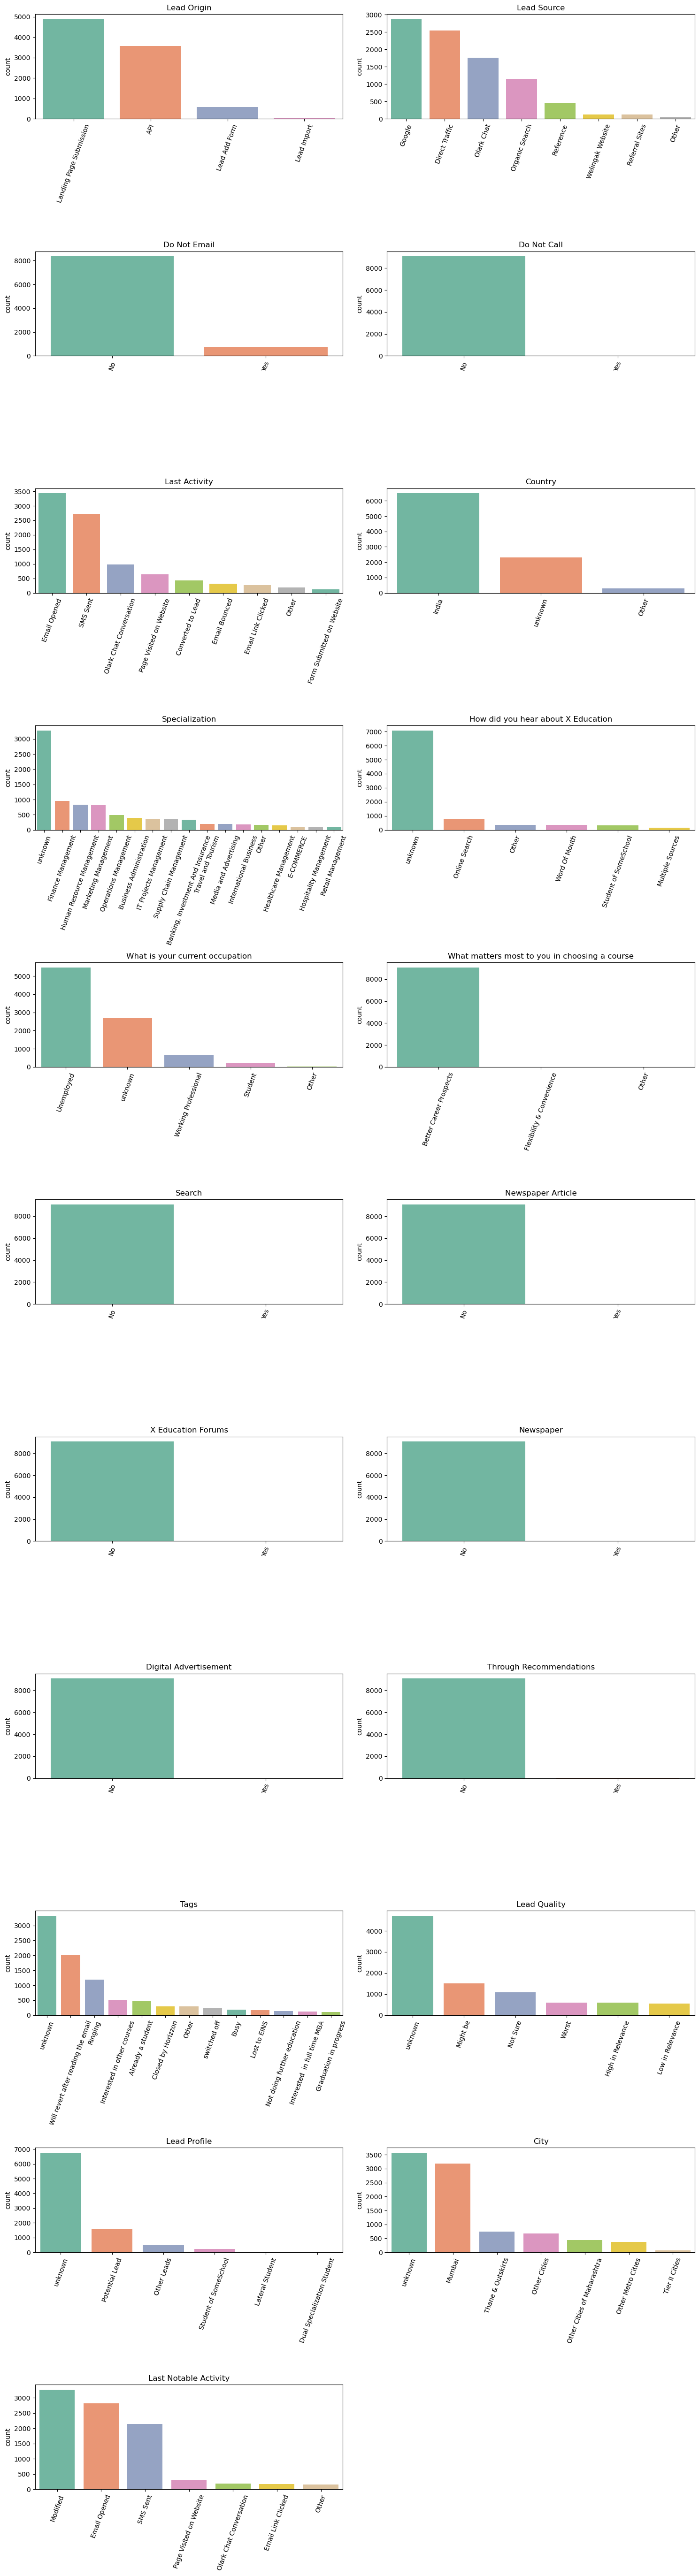

In [66]:
# Get list of categorical columns in DataFrame
categorical_columns = leads_data.select_dtypes(include=['object']).columns
# Plot the bar graph for categories columns
# Set up the figure size based on the number of categorical columns
num_cols = len(categorical_columns)
rows = (num_cols // 2) + (num_cols % 2)
plt.figure(figsize=(15, 5 * rows))
    
# Loop through each categorical column and plot
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(rows, 2, i)
    sns.countplot(x=leads_data[col], order=leads_data[col].value_counts().index, palette='Set2')
    plt.title(col)
    plt.xlabel('')  # Remove default xlabel for better clarity
    plt.xticks(rotation=70)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()

- **Lead Origin:** The majority of leads come from "Landing Page Submission," indicating that website visitors are a major source of potential customers.
- **Lead Source:** "Google" and "Direct Traffic" contribute significantly to lead generation, while other sources have lower representation.
- **Specialization:** The most common specializations among leads are "Marketing Management", "Human Resource Management" and "Finance Management," suggesting these fields have high interest in courses.
- **Lead Profile:** "Unknown Lead" dominate, confirming that most leads are not well classified.
- **Last Activity:** "Email Opened" and "SMS Sent" are the most frequent activities, implying that email and SMS marketing play a crucial role in engagement.

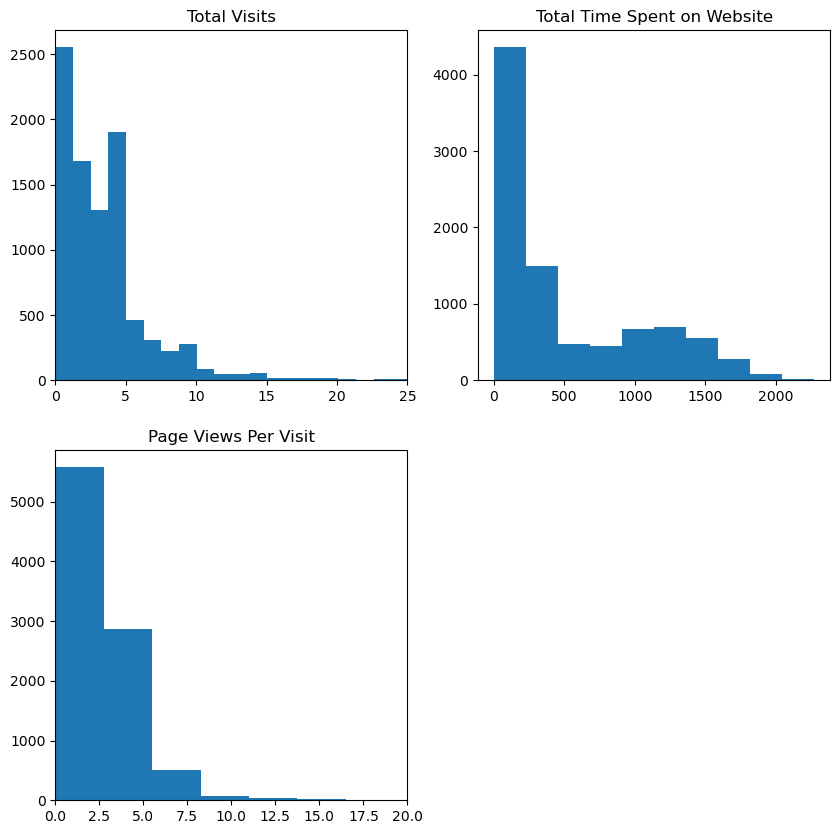

In [68]:
#Plot the hist graph for numerical columns
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(leads_data['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(leads_data['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(leads_data['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

- Skewed Distribution: All three metrics—Total Visits, Total Time Spent on Website, and Page Views Per Visit—are highly right-skewed
- Majority of Users Have Low Interaction: Most users have fewer than 5 total visits, less than 500 seconds spent on the website, and under 3 page views per visit

In [70]:
#check statistic of numerical columns
leads_data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


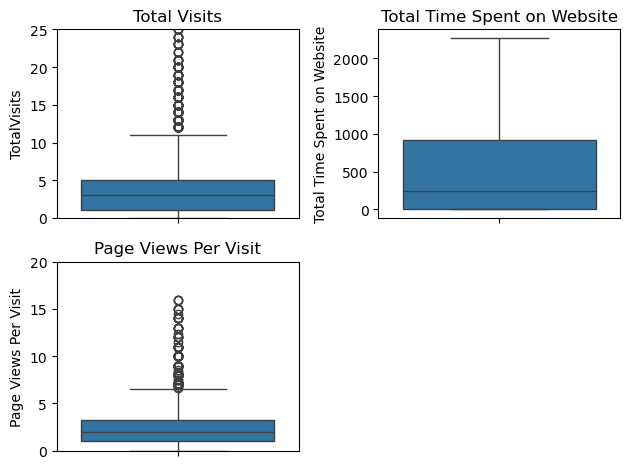

In [71]:
#Plot the box plot for numerical columns
plt.subplot(221)
sns.boxplot(y=leads_data['TotalVisits'])
plt.title('Total Visits')
plt.ylim(0, 25)

plt.subplot(222)
sns.boxplot(y=leads_data['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')

plt.subplot(223)
sns.boxplot(y=leads_data['Page Views Per Visit'])
plt.title('Page Views Per Visit')
plt.ylim(0, 20)

plt.tight_layout()
plt.show()

There are outliers in **Total Visits** and **Page Views Per Visit**, but their distance from the median is not significant. Therefore, these outliers are retained as they do not heavily impact the overall distribution of the data.

Then draw a bar chart for each categorical column and group by the target variable (Converted) to check whether the frequency of each value in each categorical column affects the conversion rate (Converted = 1).

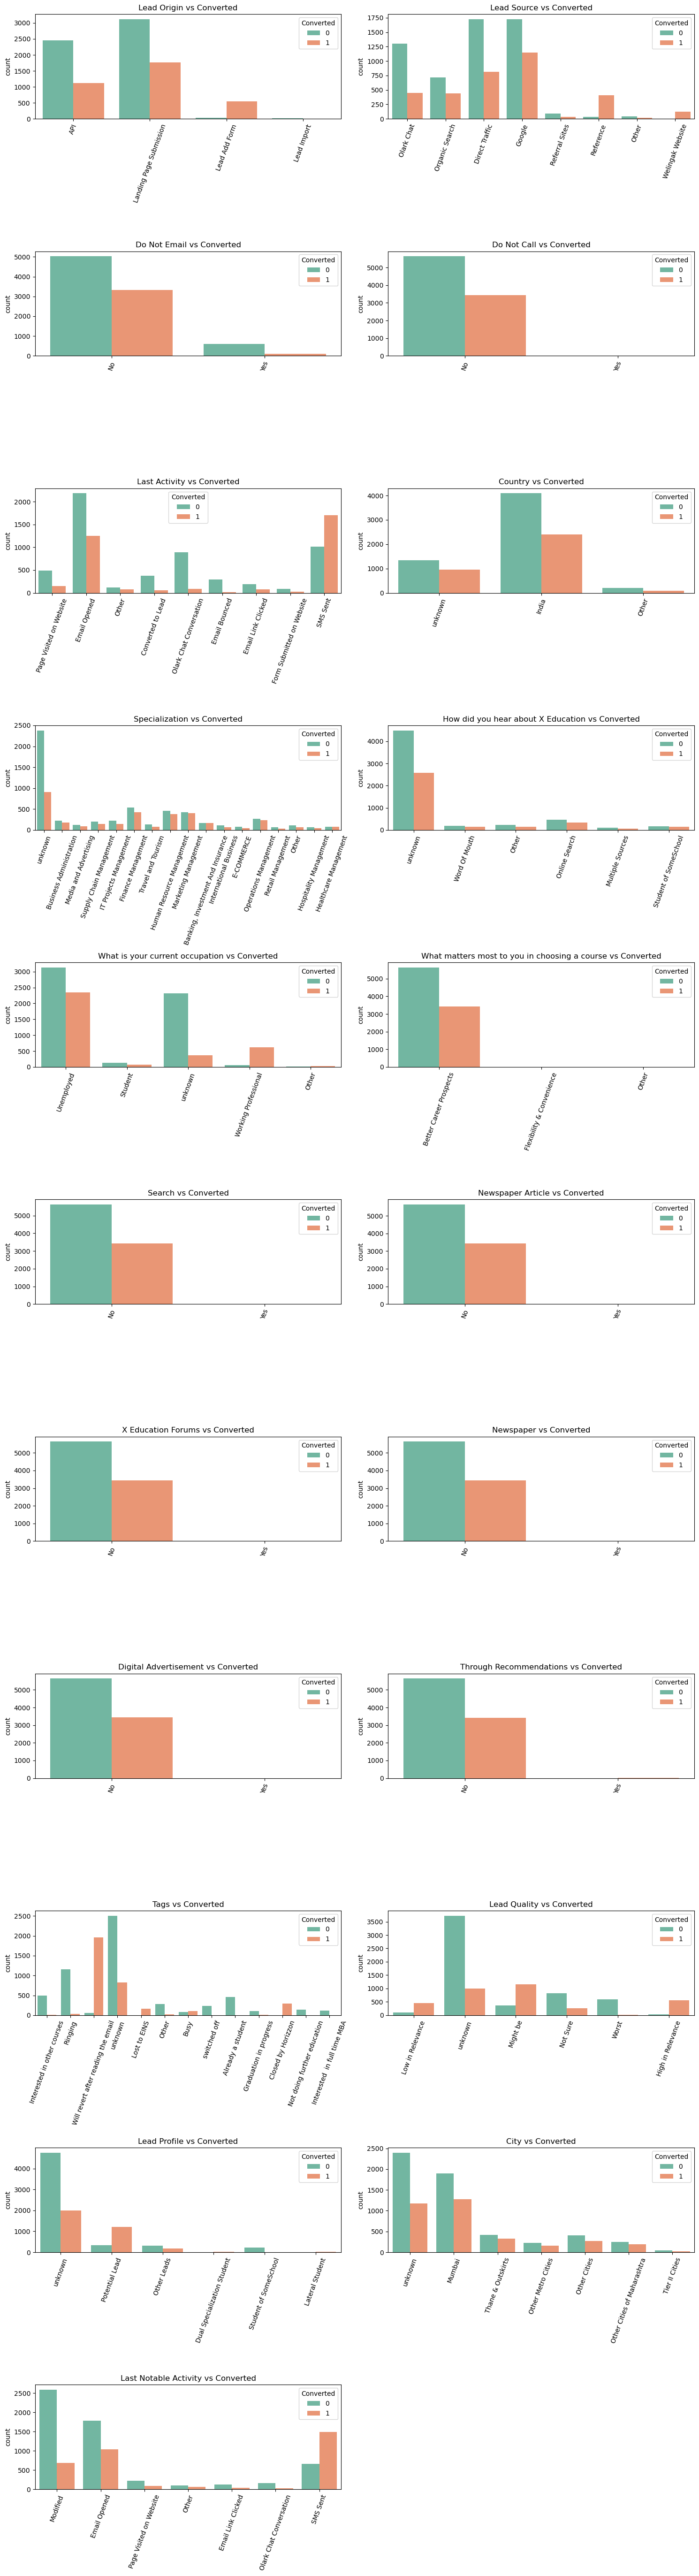

In [74]:
#Specify the number of rows to display in the chart
bi_rows = (num_cols // 2) + (num_cols % 2)
plt.figure(figsize=(15, 5 * bi_rows))
#Iterate through each categorical columns and plot the graph
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(bi_rows, 2, i)
    sns.countplot(x=leads_data[col], hue=leads_data['Converted'], palette='Set2')
    plt.title(f'{col} vs Converted')
    plt.xlabel('')  # Remove default xlabel for better clarity
    plt.xticks(rotation=70)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()

- Leads originating from the **Add Form** show a significantly higher conversion rate compared to other sources, indicating its effectiveness in attracting high-quality leads.
- Similarly, leads from **Reference and Welingak Website** within the Lead Source category also exhibit a higher proportion of conversions.
- Customers **who were sent SMS** have a notably higher likelihood of conversion, suggesting that direct communication via SMS plays a crucial role in engagement.
- **Working professionals** tend to convert at a higher rate compared to other occupational groups, making them a key target segment.
- Leads categorized as **"Potential Lead"** in the Lead Profile section have a significantly higher conversion rate, reinforcing their strong potential for becoming paying customers.
- In the Tags category, leads marked as **"Will revert after reading the email"** also have a high conversion rate, suggesting that these leads are more engaged and likely to convert.

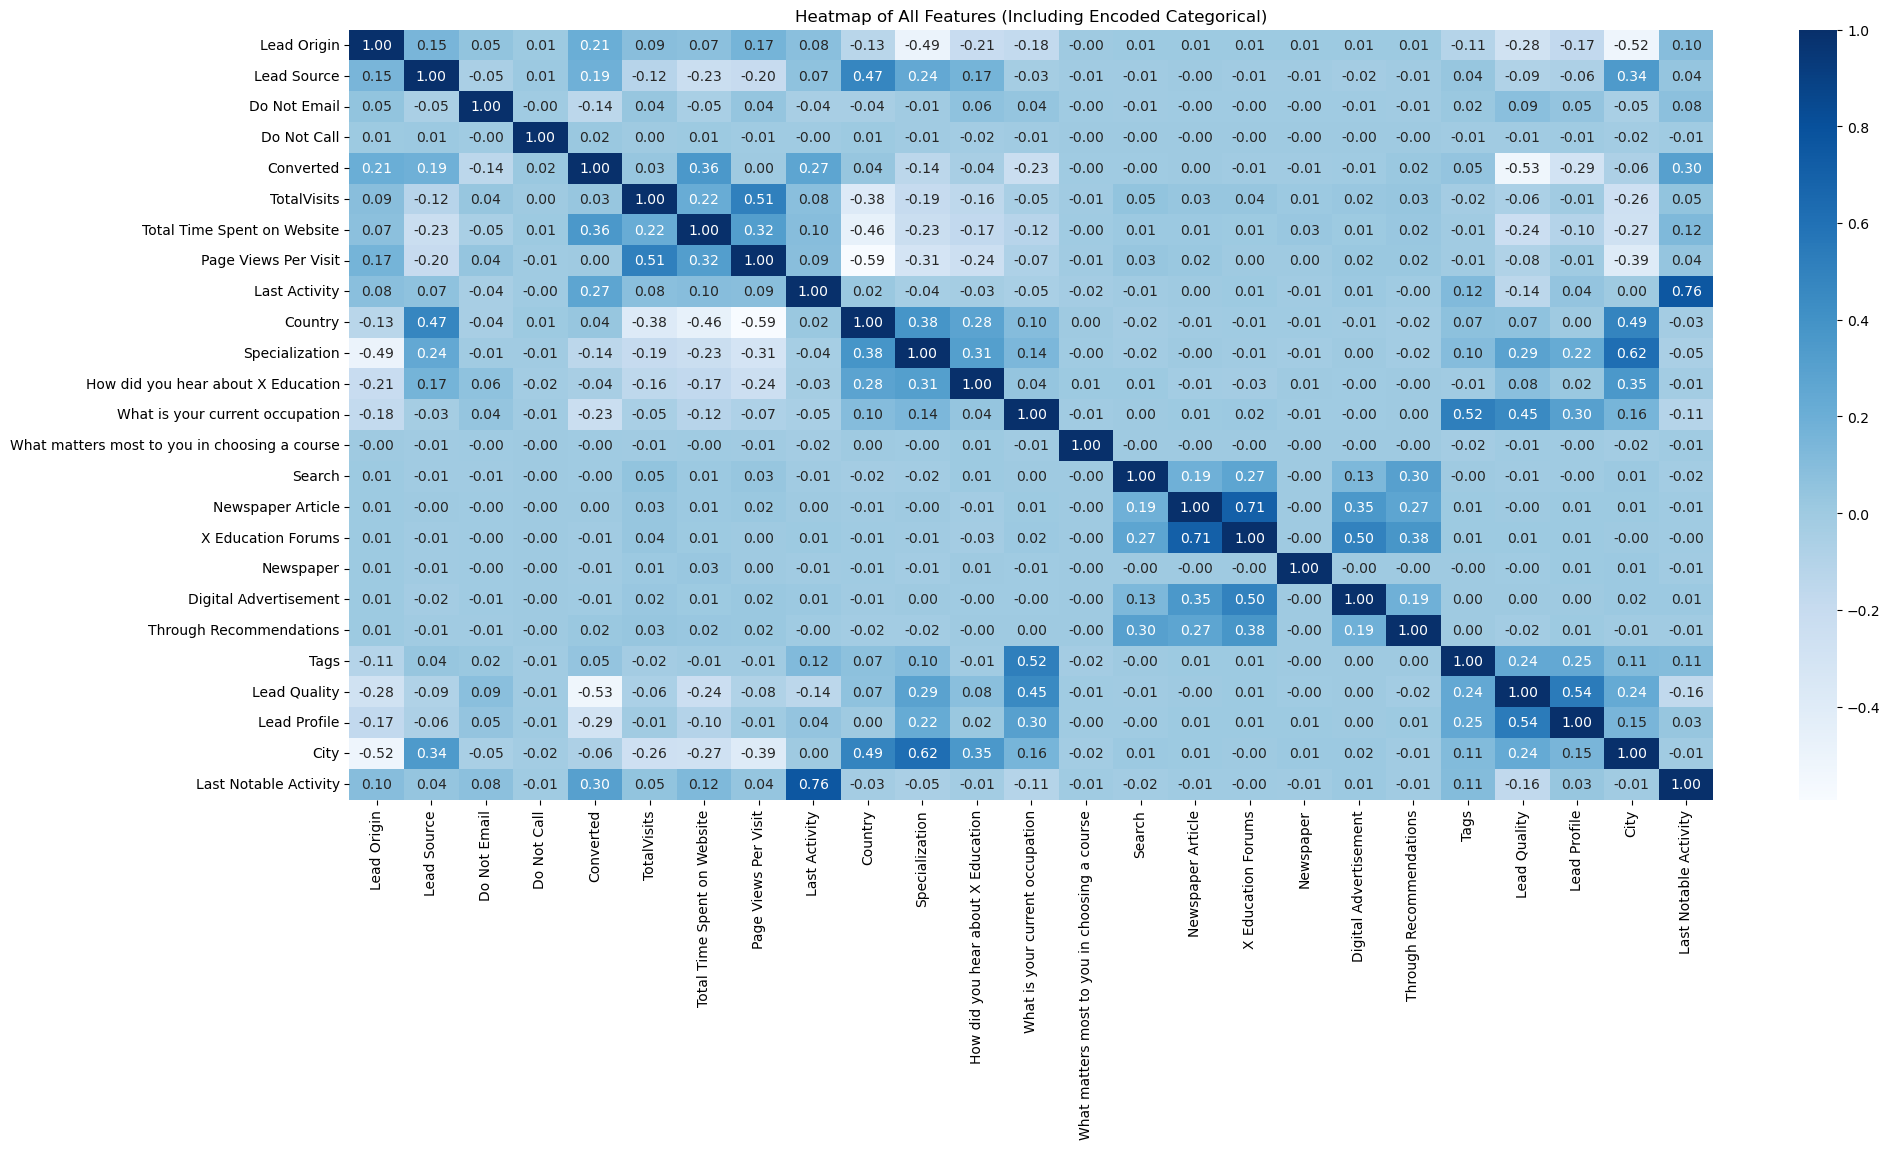

In [76]:
#Convert categorical variables to numbers to calculate the correlation matrix.
df_encoded = leads_data.copy() 
for col in categorical_columns: 
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Plot heatmap for the entire dataset, including encoded categorical features
plt.figure(figsize=(22, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Heatmap of All Features (Including Encoded Categorical)')
plt.show()

There is a high correlation (0.76) between Last Activity and Last Notable Activity. However, both columns will be retained for model building as they may capture distinct behavioral patterns of leads at different stages

In [78]:
# save the processed dataset for further use if needed
leads_data_backup = leads_data.copy()

#### 2.4 Data pre-processing for model building

##### Converting some binary variables (Yes/No) to 0/1

In [81]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums','Newspaper', 'Digital Advertisement', 'Through Recommendations']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_data[varlist] = leads_data[varlist].apply(binary_map)

##### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [83]:
categorical_columns = leads_data.select_dtypes(include=['object']).columns

# Convert categorical columns to dummy variables
dummy_vars = pd.get_dummies(leads_data[categorical_columns], drop_first=True)

# Concatenate the dummy variables with the original dataframe
leads_data = pd.concat([leads_data, dummy_vars], axis=1)

# Drop the original categorical columns
leads_data = leads_data.drop(columns=categorical_columns, axis=1)

# Display the final dataframe
leads_data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Other,Country_unknown,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_unknown,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_unknown,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Tags_unknown,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Quality_unknown,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False

In [84]:
#check types of all columns
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 93 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9074 non-null   int64  
 1   Do Not Call                                                              9074 non-null   int64  
 2   Converted                                                                9074 non-null   int64  
 3   TotalVisits                                                              9074 non-null   float64
 4   Total Time Spent on Website                                              9074 non-null   int64  
 5   Page Views Per Visit                                                     9074 non-null   float64
 6   Search                                                                   9074

In [85]:
# Convert all bool columns in DataFrame to 0 and 1 values
bool_columns = leads_data.select_dtypes(include=['bool']).columns
# Convert bool columns to int (0 and 1)
leads_data[bool_columns] = leads_data[bool_columns].astype(int)

### Step 3: Test-Train Split

In [87]:
# import library
from sklearn.model_selection import train_test_split

In [88]:
# Putting feature variable to X
X = leads_data.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Other,Country_unknown,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_unknown,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_unknown,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Tags_unknown,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Quality_unknown,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [89]:
# Putting response variable to y
y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [90]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [91]:
print ('leads_data',leads_data.shape)
print ('X_train',X_train.shape)
print ('X_test',X_test.shape)
print ('y_train',y_train.shape)
print ('y_test',y_test.shape)

leads_data (9074, 93)
X_train (6351, 92)
X_test (2723, 92)
y_train (6351,)
y_test (2723,)


### Step 4: Feature Scaling

In [93]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Other,Country_unknown,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_unknown,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_unknown,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Tags_unknown,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Quality_unknown,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1289,0,0,0.014184,0.612676,0.083333,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
3604,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
5584,1,0,0.042553,0.751761,0.250000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7679,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
7563,1,0,0.014184,0.787852,0.083333,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0


In [94]:
# Checking the Converted Rate
Converted_Rate = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
Converted_Rate

37.85541106458012

We have about 37% converted rate. This is neither exactly 'balanced' (which a 50-50 ratio would be called) nor heavily imbalanced. So we'll not have to do any special treatment for this dataset.

### Step 5: Feature Selection Using RFE


In [97]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [98]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with <15 variables as output
rfe = rfe.fit(X_train, y_train)

In [99]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 14),
 ('Do Not Call', False, 50),
 ('TotalVisits', False, 12),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 32),
 ('Search', False, 46),
 ('Newspaper Article', False, 67),
 ('X Education Forums', False, 63),
 ('Newspaper', False, 66),
 ('Digital Advertisement', False, 61),
 ('Through Recommendations', False, 72),
 ('Lead Origin_Landing Page Submission', False, 23),
 ('Lead Origin_Lead Add Form', False, 20),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Source_Google', False, 48),
 ('Lead Source_Olark Chat', False, 57),
 ('Lead Source_Organic Search', False, 43),
 ('Lead Source_Other', False, 17),
 ('Lead Source_Reference', False, 21),
 ('Lead Source_Referral Sites', False, 59),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 45),
 ('Last Activity_Email Opened', False, 37),
 ('Last Activity_Form Submitted on Website', False, 36),
 ('Last Activity

In [100]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Country_unknown',
       'What is your current occupation_unknown', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_unknown', 'Lead Quality_Worst', 'Last Notable Activity_Other',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Step 6: Building the model with StatsModels

In [102]:
import statsmodels.api as sm

In [103]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1113.9
Date:                Tue, 18 Mar 2025   Deviance:                       2227.9
Time:                        17:34:35   Pearson chi2:                 1.13e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6261
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.0810      0.246    -20.638      0.000      -5.564      -4.598
Total Time Spent on Website                  4.8200      0.279     17.287      0.000       4.274       5.367
Lead Source_Welingak Website                 3.6545      1.024      3.568      0.000       1.647       5.662
Last Activity_Email Bounced                 -2.1576      0.483     -4.470      0.000      -3.104      -1.212
Country_unknown                              1.1861      0.157      7.570      0.000       0.879       1.493
What is your current occupation_unknown     -2.4188      0.149    -16.213      0.000      -2.711      -2.126
Tags_Busy                                    2.8405      0.308      9.219      0.000       2.237       3.444
Tags_Closed by Horizzon                      8.3130      0.748     11.121      0.000       6.848       9.778
Tags_Lost to EINS                            8.6002      0.606     14.180      0.000       7.412       9.789
Tags_Ringing                                -1.5133      0.309     -4.903      0.000      -2.118      -0.908
Tags_Will revert after reading the email     6.7196      0.280     24.019      0.000       6.171       7.268
Tags_switched off                           -2.5325      0.768     -3.299      0.001      -4.037      -1.028
Tags_unknown                                 3.6876      0.245     15.068      0.000       3.208       4.167
Lead Quality_Worst                          -2.4566      0.780     -3.152      0.002      -3.984      -0.929
Last Notable Activity_Other                  1.4593      0.439      3.323      0.001       0.598       2.320
Last Notable Activity_SMS Sent               2.5970      0.141     18.360      0.000       2.320       2.874
============================================================================================================
"""

In [104]:
# Getting the predicted values on the train set
y_train_pred = res1.predict(X_train_sm)
y_train_pred[:10]

1289    0.826309
3604    0.067478
5584    0.291747
7679    0.067478
7563    0.002738
7978    0.998220
7780    0.860696
7863    0.969146
838     0.930977
708     0.889978
dtype: float64

In [105]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.82630936, 0.06747772, 0.29174666, 0.06747772, 0.00273817,
       0.99822037, 0.86069602, 0.96914596, 0.93097671, 0.88997755])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [107]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,1,0.826309,1289
1,0,0.067478,3604
2,0,0.291747,5584
3,0,0.067478,7679
4,0,0.002738,7563


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0


In [109]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,1,0.826309,1289,1
1,0,0.067478,3604,0
2,0,0.291747,5584,0
3,0,0.067478,7679,0
4,0,0.002738,7563,0


In [110]:
# import library for metrics
from sklearn import metrics

In [111]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3770  125]
 [ 286 2170]]


In [112]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9352857817666509


The first model have accuracy ~0.94

##### Checking VIFs

In [115]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [116]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_unknown,5.70
4,What is your current occupation_unknown,4.49
0,Total Time Spent on Website,2.35
9,Tags_Will revert after reading the email,2.08
3,Country_unknown,1.76
14,Last Notable Activity_SMS Sent,1.60
8,Tags_Ringing,1.22
1,Lead Source_Welingak Website,1.15
6,Tags_Closed by Horizzon,1.14
2,Last Activity_Email Bounced,1.12


Since **Tags_unknown** has a VIF of 5.7, which is relatively high but not overly critical, we will run the model with and without **Tags_unknown** to compare its accuracy.

In [118]:
col = col.drop('Tags_unknown', 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Country_unknown',
       'What is your current occupation_unknown', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Worst', 'Last Notable Activity_Other',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [119]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1284.3
Date:                Tue, 18 Mar 2025   Deviance:                       2568.7
Time:                        17:34:35   Pearson chi2:                 1.09e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6055
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.0170      0.134    -22.516      0.000      -3.280      -2.754
Total Time Spent on Website                  4.7992      0.255     18.791      0.000       4.299       5.300
Lead Source_Welingak Website                 4.9626      1.022      4.858      0.000       2.960       6.965
Last Activity_Email Bounced                 -1.9022      0.487     -3.906      0.000      -2.857      -0.948
Country_unknown                              1.4938      0.145     10.284      0.000       1.209       1.778
What is your current occupation_unknown     -0.9436      0.118     -7.976      0.000      -1.175      -0.712
Tags_Busy                                    0.7279      0.244      2.978      0.003       0.249       1.207
Tags_Closed by Horizzon                      6.2138      0.736      8.441      0.000       4.771       7.657
Tags_Lost to EINS                            5.8633      0.601      9.762      0.000       4.686       7.040
Tags_Ringing                                -3.6896      0.247    -14.961      0.000      -4.173      -3.206
Tags_Will revert after reading the email     4.5790      0.199     23.006      0.000       4.189       4.969
Tags_switched off                           -4.6898      0.745     -6.295      0.000      -6.150      -3.230
Lead Quality_Worst                          -3.8314      0.565     -6.782      0.000      -4.939      -2.724
Last Notable Activity_Other                  1.3356      0.418      3.198      0.001       0.517       2.154
Last Notable Activity_SMS Sent               2.6957      0.128     21.052      0.000       2.445       2.947
============================================================================================================
"""

In [120]:
y_train_pred = res2.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]
# Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,1,0.480851,1289,0
1,0,0.078222,3604,0
2,0,0.285093,5584,0
3,0,0.078222,7679,0
4,0,0.006899,7563,0


In [121]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print('confusion_metrics',confusion)
# Let's check the overall accuracy.
print('overall accuracy',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

confusion_metrics [[3719  176]
 [ 313 2143]]
overall accuracy 0.923004251299008


The overall accuracy decreased slightly from approximately 0.94 to 0.92, which is not a significant drop.

In [123]:
# Checking VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,2.06
9,Tags_Will revert after reading the email,1.86
3,Country_unknown,1.55
13,Last Notable Activity_SMS Sent,1.55
4,What is your current occupation_unknown,1.44
8,Tags_Ringing,1.17
2,Last Activity_Email Bounced,1.12
6,Tags_Closed by Horizzon,1.11
11,Lead Quality_Worst,1.09
1,Lead Source_Welingak Website,1.08


All variables have acceptable VIF and p-values, and the second model appears to deliver good accuracy with a reasonable number of variables. Therefore, it will be retained for further evaluation.

### Step 7: Model Evaluation

##### Calculating Sensitivity & Specificity

In [127]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [128]:
# check some metrics.
# accuracy
print ('accuracy', metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
# confusion
print (confusion)
#sensitivity
print ('sensitivity',TP / float(TP+FN))
#specificity
print ('specificity',TN / float(TN+FP))
#false postive rate - predicting converted but actual not converted
print ('false positive rate',FP/ float(TN+FP))
# Positive predictive value 
print ('Positive predictive value',TP / float(TP+FP))
# Negative predictive value
print ('Negative predictive value',TN / float(TN+ FN))

accuracy 0.923004251299008
[[3719  176]
 [ 313 2143]]
sensitivity 0.872557003257329
specificity 0.954813863928113
false positive rate 0.04518613607188703
Positive predictive value 0.9241052177662785
Negative predictive value 0.9223710317460317


##### Plotting the ROC Curve and find optimal cut-off point

In [130]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [131]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

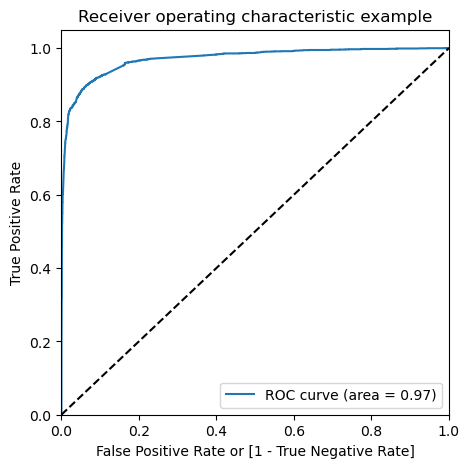

In [132]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

##### Finding Optimal Cutoff Point

In [134]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.480851,1289,0,1,1,1,1,1,0,0,0,0,0
1,0,0.078222,3604,0,1,0,0,0,0,0,0,0,0,0
2,0,0.285093,5584,0,1,1,1,0,0,0,0,0,0,0
3,0,0.078222,7679,0,1,0,0,0,0,0,0,0,0,0
4,0,0.006899,7563,0,1,0,0,0,0,0,0,0,0,0


In [135]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.386711  1.000000  0.000000
0.1   0.1  0.860967  0.967020  0.794095
0.2   0.2  0.905527  0.927524  0.891656
0.3   0.3  0.918438  0.904316  0.927343
0.4   0.4  0.921745  0.888029  0.943004
0.5   0.5  0.923004  0.872557  0.954814
0.6   0.6  0.920957  0.846498  0.967908
0.7   0.7  0.921272  0.829805  0.978947
0.8   0.8  0.907101  0.783795  0.984852
0.9   0.9  0.888679  0.726384  0.991014


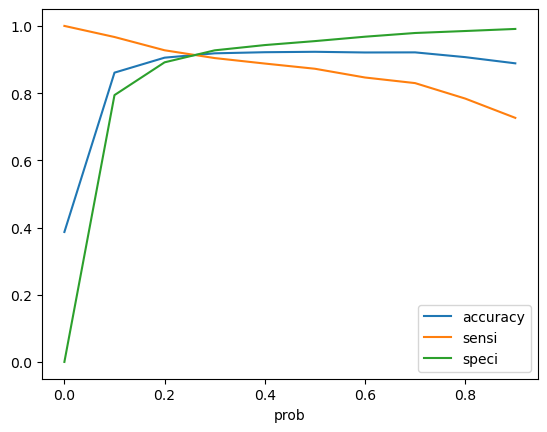

In [136]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, the optimal cut-off came to be 0.25

In [138]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.25 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.480851,1289,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.078222,3604,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.285093,5584,0,1,1,1,0,0,0,0,0,0,0,1
3,0,0.078222,7679,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.006899,7563,0,1,0,0,0,0,0,0,0,0,0,0


In [139]:
# check some metrics.
# accuracy
print ('accuracy', metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
# confusion
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print (confusion2)
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
#sensitivity
print ('sensitivity',TP / float(TP+FN))
#specificity
print ('specificity',TN / float(TN+FP))
#false postive rate - predicting converted but actual not converted
print ('false positive rate',FP/ float(TN+FP))
# Positive predictive value 
print ('Positive predictive value',TP / float(TP+FP))
# Negative predictive value
print ('Negative predictive value',TN / float(TN+ FN))

accuracy 0.9129270980947882
[[3544  351]
 [ 202 2254]]
sensitivity 0.9177524429967426
specificity 0.9098844672657252
false positive rate 0.09011553273427471
Positive predictive value 0.8652591170825336
Negative predictive value 0.9460758142018153


At the cut-off point of 0.25, the model demonstrates strong performance:

- High **accuracy (91.3%)**, with **Sensitivity (91.8%)** and **Specificity (91%)**, ensuring a balanced ability to identify both potential and non-converting customers.
- Low **False Positive Rate (9%)** reduces the risk of targeting non-converting customers, while **Positive Predictive Value (86.5%)** confirms a high conversion rate among predicted leads.
- **Negative Predictive Value (94.6%)** indicates the model effectively filters out non-converting customers, optimizing resource allocation.

### Step 8: Making predictions on the test set

In [142]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Other,Country_unknown,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_unknown,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_unknown,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Tags_unknown,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Quality_unknown,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
8308,0,0,5.0,947,5.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
7212,0,0,4.0,3,4.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2085,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
4048,0,0,4.0,1402,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
4790,0,0,4.0,12,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0


In [143]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [144]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Other,Country_unknown,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_unknown,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_unknown,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Tags_unknown,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Quality_unknown,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
8308,0,0,0.035461,0.416813,0.208333,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
7212,0,0,0.028369,0.001320,0.166667,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2085,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
4048,0,0,0.028369,0.617077,0.083333,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
4790,0,0,0.028369,0.005282,0.083333,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0


In [145]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Welingak Website,Last Activity_Email Bounced,Country_unknown,What is your current occupation_unknown,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Worst,Last Notable Activity_Other,Last Notable Activity_SMS Sent
8308,0.416813,0,0,0,0,0,0,0,0,0,0,0,0,0
7212,0.001320,0,0,0,0,0,0,0,0,1,0,0,0,1
2085,0.000000,1,0,1,0,0,0,0,0,0,0,0,0,0
4048,0.617077,0,0,0,0,0,0,0,0,0,0,0,0,1
4790,0.005282,0,0,0,0,0,0,0,0,0,0,0,0,0


In [146]:
# Add constant
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [148]:
y_test_pred = res2.predict(X_test_sm)
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
8308,0.265688
7212,0.986130
2085,0.968913
4048,0.933407
4790,0.047806


In [149]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [150]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [151]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [152]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [153]:
y_pred_final.head()

,Converted,CustID,0
0,0,8308,0.265688
1,1,7212,0.986130
2,1,2085,0.968913
3,1,4048,0.933407
4,0,4790,0.047806


In [154]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [155]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['CustID', 'Converted', 'Converted_Prob'])

In [156]:
# see the head of y_pred_final
y_pred_final.head()

,CustID,Converted,Converted_Prob
0,8308,0,0.265688
1,7212,1,0.986130
2,2085,1,0.968913
3,4048,1,0.933407
4,4790,0,0.047806


In [157]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.25 else 0)
y_pred_final.head()

,CustID,Converted,Converted_Prob,final_predicted
0,8308,0,0.265688,1
1,7212,1,0.986130,1
2,2085,1,0.968913,1
3,4048,1,0.933407,1
4,4790,0,0.047806,0


In [158]:
# Let's check the overall accuracy.
print ('accuracy_test',metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print ('confusion metric',confusion3)
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives
# see the sensitivity of our logistic regression model
print ('sensitivity',TP / float(TP+FN))
# calculate specificity
print ('specificity',TN / float(TN+FP))
#false postive rate - predicting converted but actual not converted
print ('false positive rate',FP/ float(TN+FP))
# Positive predictive value 
print ('Positive predictive value',TP / float(TP+FP))
# Negative predictive value
print ('Negative predictive value',TN / float(TN+ FN))

accuracy_test 0.9041498347410943
confusion metric [[1564  180]
 [  81  898]]
sensitivity 0.9172625127681308
specificity 0.8967889908256881
false positive rate 0.10321100917431193
Positive predictive value 0.8330241187384044
Negative predictive value 0.9507598784194529


**The model exhibits strong stability and is well-suited for real-world deployment. With an accuracy of 90.04% on the test set and 91.3% on the training set, the minimal performance gap suggests that the model generalizes well without signs of overfitting. Furthermore, its high sensitivity (91.7%) and specificity (89.7%) indicate a balanced ability to accurately identify both converted and non-converted leads, making it a reliable choice for implementation.**

### Step 9: Assign Lead Score

In [161]:
col

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Country_unknown',
       'What is your current occupation_unknown', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Worst', 'Last Notable Activity_Other',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [162]:
# Ensure leads_data contains only columns used in training
leads_data_traincol = leads_data[col]

# Add constant
X_sm = sm.add_constant(leads_data_traincol)

# Lead score prediction
leads_data['lead_score'] = res2.predict(X_sm) * 100  # Use X_sm for prediction
leads_data['lead_score'] = round(leads_data['lead_score'], 2)

# Check leads_data again
leads_data.head()


,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Other,Country_unknown,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_unknown,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_unknown,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Tags_unknown,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Quality_unknown,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,lead_score
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,17.9
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,100.0
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,100.0
3,0,0,0,1.0,305,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,100.0
4,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,100.0


In [163]:
leads_data['lead_score'].value_counts()

lead_score
100.00    6890
7.82       735
17.90      304
99.68      244
95.50      193
0.47       109
99.09      101
76.36       77
0.54        68
99.78       56
7.47        51
55.70       45
96.89       35
98.71       24
1.25        24
99.99       22
0.20        10
3.15         9
11.01        7
86.99        5
99.97        5
98.78        5
96.76        4
94.74        4
31.10        4
99.65        3
24.39        3
4.67         3
99.86        2
93.99        2
2.03         2
99.95        2
1.78         2
96.07        2
0.07         2
2.88         2
12.93        1
68.75        1
96.18        1
4.59         1
98.60        1
0.27         1
45.32        1
99.08        1
82.66        1
0.08         1
99.13        1
5.18         1
89.79        1
70.25        1
81.67        1
0.31         1
94.65        1
62.45        1
Name: count, dtype: int64

In [164]:
#Assign the lead_score column to the original dataset while retaining complete customer information.
leads_data_leadscoring = pd.concat([leads_data_backup, leads_data[['lead_score']]], axis=1)
leads_data_leadscoring.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Last Notable Activity,lead_score
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,unknown,unknown,unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,unknown,unknown,Modified,17.9
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,unknown,unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,unknown,unknown,unknown,Email Opened,100.0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,unknown,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,Email Opened,100.0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Other,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,unknown,Mumbai,Modified,100.0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,unknown,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,unknown,Mumbai,Modified,100.0
